# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [203]:
#ваш код
import pandas as pd
import numpy as np
df = pd.read_csv("data/Advertising.csv")

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [204]:
#ваш код
df.isnull().sum()
# видим, что пропусков нет

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [205]:
#ваш код
X = df.iloc[:, 1 : 4].to_numpy()
y = df.iloc[:, 4].to_numpy().reshape(-1, 1)


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [206]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [207]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))


**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [218]:
import numpy as np

def fit_linear_regression(X, y, learning_rate=0.01, tol=1e-3, max_iter=1000):
    n_samples, n_features = X.shape
    coefficients = np.zeros(n_features)  # коэффициенты без учета сдвига

    # Итерационный процесс обучения
    for _ in range(max_iter):
        coef_prev = np.copy(coefficients)
        # Обновляем коэффициенты для каждого признака
        for j in range(n_features):
            gradient = calculate_gradient(X, y, coefficients, j)
            coefficients[j] -= learning_rate * gradient

        # Проверяем критерий остановки
        if np.linalg.norm(coefficients - coef_prev) < tol:
            break

    return coefficients

def calculate_gradient(X, y, coefficients, j):
    n_samples = X.shape[0]
    predictions = np.dot(X, coefficients)
    errors = predictions - y
    # Вычисляем градиент для j-го коэффициента
    gradient = np.sum(X[:, j] * errors) / n_samples
    return gradient


# Обучаем модель
coefficients = fit_linear_regression(X, y)

# Выводим коэффициенты
print("Коэффициенты модели:", coefficients)


Коэффициенты модели: [149.97524029  25.34470809  15.58270302  10.00276896]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [220]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)


[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

У меня не сошлось(

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [222]:
#ваш код
X = df.iloc[:, 1 : 4].to_numpy()

# Считаем среднее значение и стандартное отклонение по каждому столбцу
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

# Стандартизируем данные
standardized_data = (X - mean) / std_dev


**Добавим единичный столбец**

In [223]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [224]:
def mse_error(actual, predicted):
  
    # Вычисляем MSE
    mse = np.mean((np.array(actual) - np.array(predicted))**2)
    
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [225]:
#ваш код
def naive_mean_sales_prediction(sales):
    
    # Вычисляем среднее значение продаж
    mean_sales = np.mean(sales)
    
    # Создаем массив предсказанных значений, где каждое значение равно среднему значению продаж
    predicted_sales = np.full_like(sales, mean_sales)
    
    return predicted_sales


naive_predicted_sales = naive_mean_sales_prediction(y)

# Вычисляем среднеквадратичную ошибку для наивного прогноза
mse_naive = mse_error(y, naive_predicted_sales)
print("Среднеквадратичная ошибка для наивного прогноза:", mse_naive)


Среднеквадратичная ошибка для наивного прогноза: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [226]:
#ваш код
def lin_pred(X, w):
  
    # Умножаем матрицу предикторов на вектор весов
    predictions = np.dot(X, w)
    
    return predictions


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [227]:
def stoch_grad_step(X, y, w, train_ind, eta):
   
    # Получаем признаки объекта обучающей выборки
    x_i = X[train_ind]
    
    # Предсказываем значение для объекта обучающей выборки
    prediction = np.dot(x_i, w)
    
    # Вычисляем направление изменения весов
    direction = 2 * x_i * (prediction - y[train_ind]) / len(y)
    
    # Обновляем веса
    w_updated = w - eta * direction
    
    return w_updated



**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [236]:
# ваш код
def stochastic_gradient_descent(X, y, initial_weights, learning_rate, max_iterations, tol):
    
    # Реализует стохастический градиентный спуск для линейной регрессии.

    # Параметры:
    # X (array_like): Матрица предикторов размерности (m, n), где m - количество наблюдений, n - количество признаков.
    # y (array_like): Вектор реальных значений размерности (m,).
    # initial_weights (array_like): Вектор начальных весов размерности (n,).
    # learning_rate (float): Шаг градиентного спуска.
    # max_iterations (int): Максимальное число итераций.
    # tol (float): Евклидово расстояние между векторами весов на соседних итерациях, при котором алгоритм прекращает работу.

    # Возвращает:
    # array_like: Вектор весов размерности (n,), обученный с использованием стохастического градиентного спуска.
    # array_like: Вектор ошибок, содержащий значения среднеквадратичной ошибки на каждой итерации.
    
    # Инициализация переменных
    weights = initial_weights
    errors = []
    prev_weights = np.copy(initial_weights)
    iterations = 0
    
    # Главный цикл обучения
    while iterations < max_iterations:
        # Генерируем случайный индекс
        train_ind = np.random.randint(0, len(X))
        
        # Один шаг стохастического градиентного спуска
        weights = stoch_grad_step(X, y, weights, train_ind, learning_rate)
        
        # Вычисляем среднеквадратичную ошибку и добавляем ее в список
        error = mse_error(y, lin_pred(X, weights))
        errors.append(error)
        
        # Проверяем условие остановки: если расстояние между векторами весов меньше tol, выходим из цикла
        if np.linalg.norm(weights - prev_weights) < tol:
            break
        
        # Обновляем предыдущие веса
        prev_weights = np.copy(weights)
        
        # Увеличиваем счетчик итераций
        iterations += 1
    
    return weights, errors

# Задаем вектор начальных весов (из нулей)
initial_weights = np.zeros(X.shape[1])

# Задаем параметры обучения
learning_rate_1 = 0.01
learning_rate_2 = 0.001
max_iterations = 10**5
tol = 1e-5



final_weights, errors = stochastic_gradient_descent(X, y, initial_weights, learning_rate_2, max_iterations, tol)

# Выводим результаты

print("Обученные веса (learning_rate = 0.001):", final_weights)

Обученные веса (learning_rate = 0.001): [0.00200651 0.07522962 0.06770687 0.05935291]


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

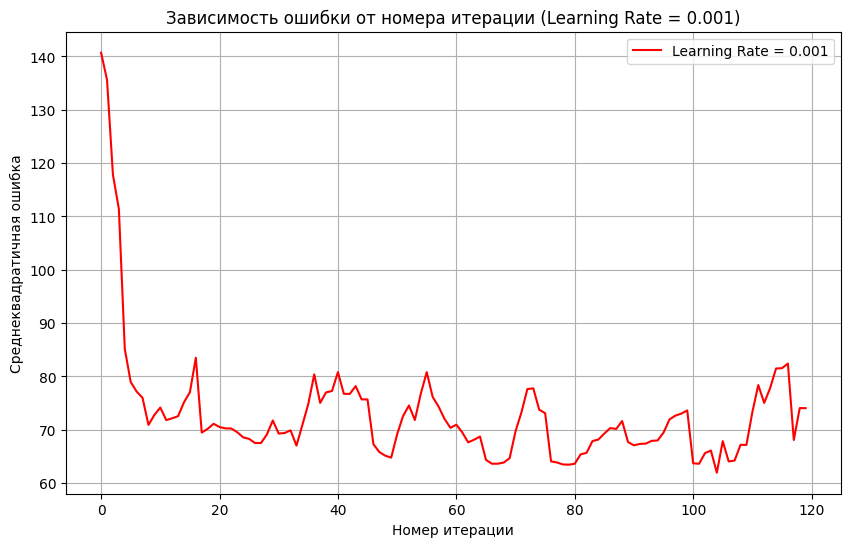

In [239]:
# Построение графика для learning_rate = 0.001 с логарифмической шкалой по оси Y
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, label='Learning Rate = 0.001', color='red')
# plt.yscale('log')  # Логарифмическая шкала по оси Y
plt.xlabel('Номер итерации')
plt.ylabel('Среднеквадратичная ошибка')
plt.title('Зависимость ошибки от номера итерации (Learning Rate = 0.001)')
plt.legend()
plt.grid(True)
plt.show()


**Выведите вектор весов, к которому сошелся метод.**

In [ ]:
# ваш код
final_weights

**Выведите среднеквадратичную ошибку на последней итерации.**

In [240]:
# ваш код
mse_last_iteration = errors[-1]
print("Среднеквадратичная ошибка на последней итерации (Learning Rate = 0.001):", mse_last_iteration)


Среднеквадратичная ошибка на последней итерации (Learning Rate = 0.001): 74.01086638660156
